<a href="https://colab.research.google.com/github/insaiyancvk/Mad-Artist/blob/main/style_transfer_on_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/dbolya/yolact

Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 23.96 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.


In [2]:
!cp "/content/drive/MyDrive/Instance segmentation/yolact_base_54_800000.pth" .

In [ ]:
!curl -o walk.jpg https://previews.123rf.com/images/mimagephotography/mimagephotography1912/mimagephotography191200294/135677185-full-body-side-portrait-of-young-man-walking-with-bag-and-mobile-phone-on-street.jpg

In [ ]:
!curl -o walk2.jpg https://ak.picdn.net/offset/photos/5b89688fdaee26d9e8c7937d/medium/photo.jpg

In [ ]:
!curl -o walk3.jpg https://img.freepik.com/premium-photo/man-walking-desolate-street-man-walking-backwards-walking-street-surrounded-by-trees_550253-411.jpg

In [3]:
!curl -o musk.jpg https://nenow.in/wp-content/uploads/2022/04/elon-musk.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   531k      0 --:--:-- --:--:-- --:--:--  531k


In [ ]:
# np.save('mask_data', masks.cpu().numpy()) at like 159 in eval.py

In [ ]:
!python ./yolact/eval.py --trained_model=yolact_base_54_800000.pth --score_threshold=0.15 --top_k=15 --display_masks="True" --image=musk.jpg:output_musk.jpg

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
mask = np.load('./mask_data.npy')

In [7]:
solutions = np.argwhere(mask[0] != 0)

In [9]:
len(solutions)

367032

In [11]:
img2 = cv2.imread('musk.jpg')[:, :, ::-1]

In [12]:
segment = np.zeros(shape=(626, 444,3))
segment = np.full((img2.shape), 255.)

In [13]:
for i in solutions:
  segment[i[0]][i[1]] = img2[i[0]][i[1]]

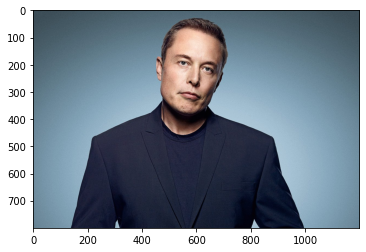

In [23]:
plt.imshow(img2.astype('uint8'))
plt.show()

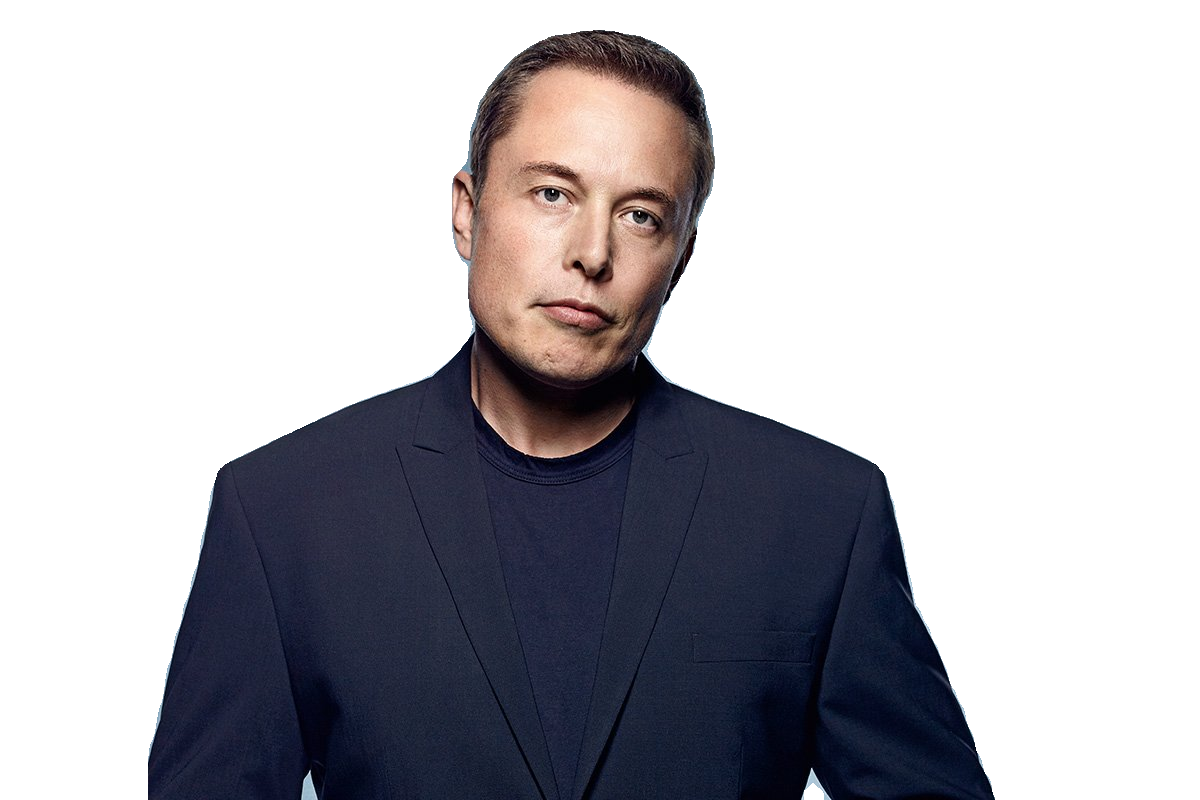

In [51]:
from PIL import Image
im = Image.fromarray(segment.astype('uint8'))
im.save("segment.jpg")
im

In [ ]:
import torch, time
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/utils.py

In [17]:
import transformer
import utils

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [30]:
STYLE_TRANSFORM_PATH = f"/content/drive/MyDrive/mosaic_transformer.pth"

In [31]:
net = transformer.TransformerNetwork()
net.load_state_dict(torch.load(STYLE_TRANSFORM_PATH, map_location=device))
net = net.to(device)

In [52]:
content_image_path = "segment.jpg"

Transfer Time: 0.22627520561218262


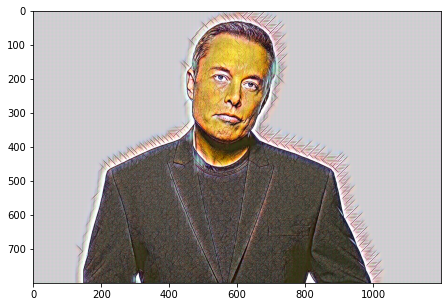

In [53]:
with torch.no_grad():
  torch.cuda.empty_cache()
  content_image = utils.load_image(content_image_path)
  starttime = time.time()
  content_tensor = utils.itot(content_image).to(device)
  generated_tensor = net(content_tensor)
  generated_image = utils.ttoi(generated_tensor.detach())
  # if (PRESERVE_COLOR):
  #     generated_image = utils.transfer_color(content_image, generated_image)
  ttime = time.time() - starttime
  print("Transfer Time: {}".format(ttime))
  utils.show(generated_image)
  utils.saveimg(generated_image, f"{content_image_path.split('.')[0]}-style.jpg")

In [54]:
generated_image.shape == img2.shape, segment.shape== content_image.shape

(True, True)

In [56]:
nimg = cv2.imread('musk.jpg')[:, :, ::-1]
styleimg = cv2.imread('segment-style.jpg')[:,:,::-1]

In [57]:
for i in solutions:
  nimg[i[0]][i[1]] = styleimg[i[0]][i[1]]

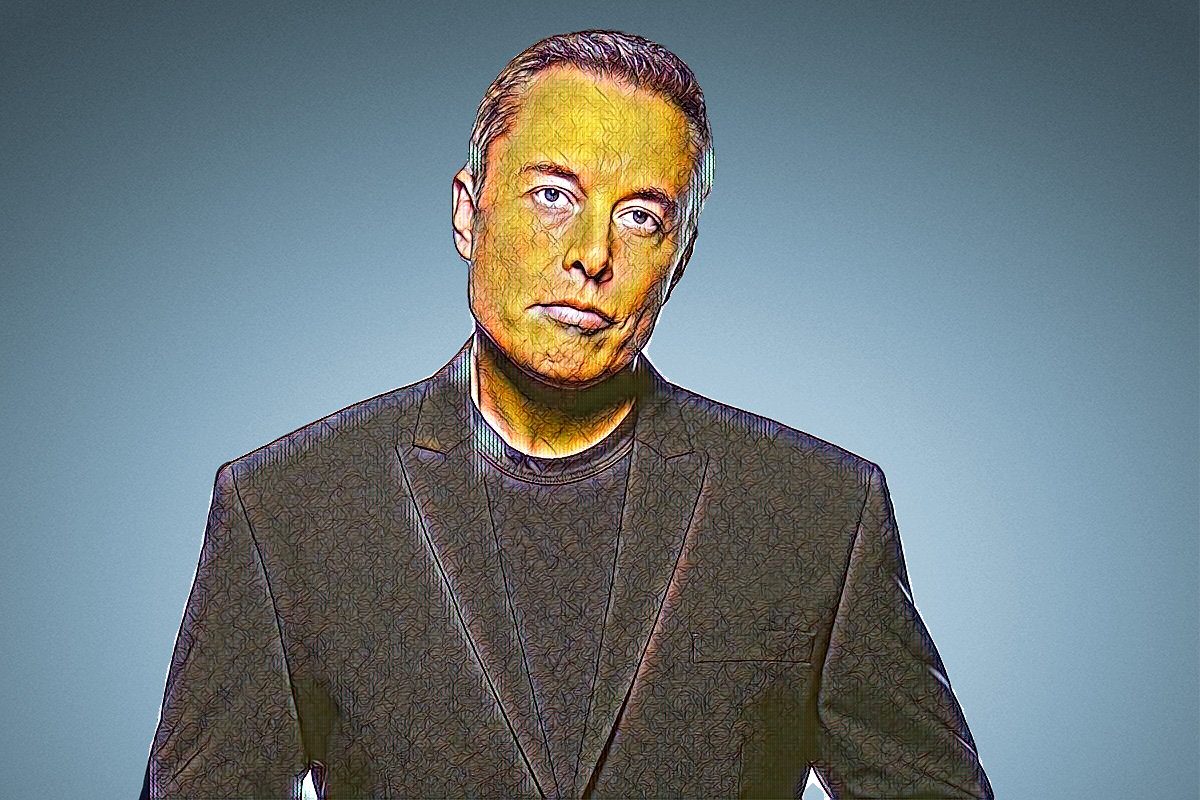

In [61]:
img = Image.fromarray(nimg.astype('uint8'))
img.save("replaced.jpg")
img